In [17]:
import bondPricing as bp
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

## Introduction

The default intensity $\lambda$ is related to the spread and the recovery rate by the relationship: 
$\lambda = \frac{Spread}{1-RecoveryRate}$

The Survival Probability P(t) and Default Probability PD(t) verify by: $ P(t) = 1 - PD(t) = e^{\int_{0}^{t}-\lambda (t) * dt}$

The Discount Factor DF(t) is given by: $ DF(t) = e^{\int_{0}^{t}-r(t) * dt}$

The price of the bond is then the sum of 3 terms:
* The coupon term: $Coupon .\int_{0}^{T}P(t) . DF(t) dt$
* The recovery term: $(1-recoveryRate).\int_{0}^{T}P(t) . DF(t).\lambda (t)dt$
* The notional term: $Notional . P(T) . DF(T)$

Assuming constant spread and interest yields the result: 
$$ Price = \frac{Coupon}{r+\lambda}.(1-e^{-(r+\lambda).T}) + \frac{recoveryRate.\lambda}{r+\lambda}.(1-e^{-(r+\lambda).T}) + Notional . P(T) . DF(T)$$

In [31]:
T = 10
C = 0.05
r = np.linspace(0, 0.2, 50)
spread = 0.01
rr = 0.4

price = 100 * bp.bond_price(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr)
cr01 = bp.bond_cr01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr)
ir01 = bp.bond_ir01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr)
cr_gamma = bp.bond_cr01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr, delta=False)
ir_gamma = bp.bond_ir01(maturity=T, coupon=C, interest_rate = r, spread=spread, recovery_rate=rr, delta=False)

### Bond Price as a function of the interest rate

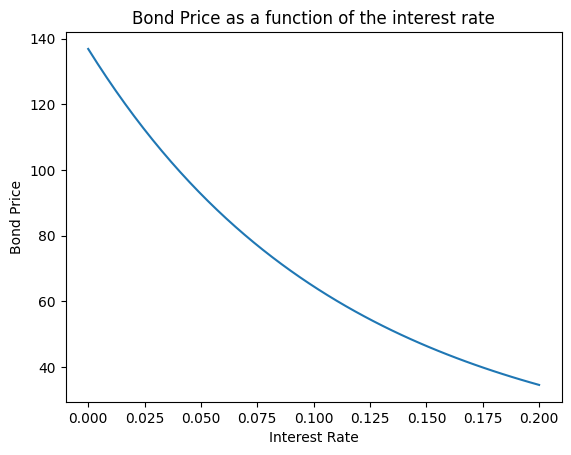

In [27]:
plt.plot(r, price)
plt.title("Bond Price as a function of the interest rate")
plt.xlabel("Interest Rate")
plt.ylabel("Bond Price");

## Bond sensitivities as a function of interest rate

### Bond CR01 (CR Delta) and IR01 (IR Delta)

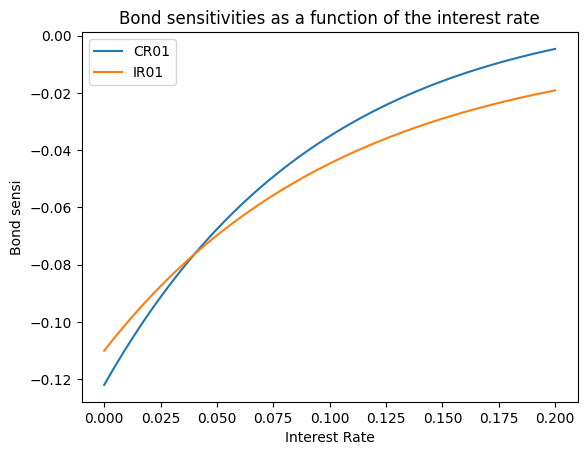

In [28]:
plt.plot(r, cr01, label="CR01")
plt.plot(r, ir01, label="IR01")
plt.title("Bond sensitivities as a function of the interest rate")
plt.xlabel("Interest Rate")
plt.ylabel("Bond sensi")
plt.legend();

### Bond CR Gamma and IR Gamma

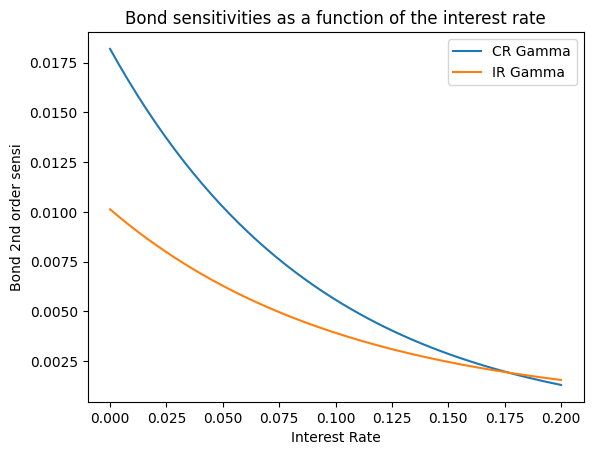

In [30]:
plt.plot(r, cr_gamma, label="CR Gamma")
plt.plot(r, ir_gamma, label="IR Gamma")
plt.title("Bond sensitivities as a function of the interest rate")
plt.xlabel("Interest Rate")
plt.ylabel("Bond 2nd order sensi")
plt.legend();